In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from enum import Enum
import csv
import pandas as pd

In [50]:
import os
folder_files = os.listdir('outputs') #You can also use full path.
print("This Folder contains {len_folder} file(s).".format(len_folder=len(folder_files)))
matrix_files = []
core_files = []
slurm_files = []

#Puts file names in lists of matrix, core or slurm files based on name (not very robust)
for file in folder_files:
    print(file)
    if "matrx" in file:
        matrix_files.append(file)
    elif "core" in file:
        core_files.append(file)
    elif "slurm" in file:
        slurm_files.append(file)

This Folder contains 6 file(s).
oblas-matrx-scaling-22291.txt
slurm-22308.out
oblas-core-scaling-22308.txt
mkl-core-scaling-22308.txt
mkl-matrx-scaling-22291.txt
slurm-22291.out


In [51]:
# Function that deletes old csv files. This is necessary because the results will be appended.
def delete_old_csv():
    folder_path = 'csv-outputs/'  # Replace with the actual folder path

    # List all files in the folder
    file_list = os.listdir(folder_path)

    # Loop through the files and delete them
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):  # Check if the path is a file (not a directory)
            os.remove(file_path)
            print(f"Deleted: {file_path}")

    print(f"All files in '{folder_path}' have been deleted.")

In [52]:
# Lists to store extracted data
matrix_dimensions = []
mkl_gflops = []
OBLAS_gflops = []
folder_prefix = 'outputs/'      #this is probably redundant (see folder_files in cell above)
output_folder = 'csv-outputs/'
class libName(Enum):
    MKL = 'mkl'
    OBLAS = 'oblas'

delete_old_csv()

# Read one matrix file at a time
for fileName in matrix_files:
    if 'mkl' in fileName:
        selected_library = libName.MKL
    elif 'oblas' in fileName:
        selected_library = libName.OBLAS
    else:
        print(f"Error, {fileName} doesn't contain 'mkl' or 'oblas'. This will produce unkown output.")
    print(f"Selected library is '{selected_library.name}'.")
    
    data = []

    # Read the text file line by line
    with open(folder_prefix + fileName, 'r') as input_file:
        for line in input_file:

            columns = line.strip().split()  # Split columns by whitespace
            if len(columns) >= 3:
                matr_size = columns[0][:columns[0].index('x')]
                data.append((matr_size, round(float(columns[3]))))  # Extract size and GFLOPs columns

        # Construct the output CSV file name using the prefix and a desired extension
        print(str(selected_library.name))
        output_file_name = output_folder + str(selected_library.name) + "-output.csv"

            # Append data to the CSV file. This allows data from more than one execution to be added to the same csv file.
        with open(output_file_name, 'a', newline='') as output_file:
            csv_writer = csv.writer(output_file)
            csv_writer.writerow(['Size', 'GFLOPs'])  # Write header
            csv_writer.writerows(data)  # Write data rows

        print(f"CSV file '{output_file_name}' created.")

Deleted: csv-outputs/MKL-output.csv
Deleted: csv-outputs/OBLAS-output.csv
All files in 'csv-outputs/' have been deleted.
Selected library is 'OBLAS'.
OBLAS
CSV file 'csv-outputs/OBLAS-output.csv' created.
Selected library is 'MKL'.
MKL
CSV file 'csv-outputs/MKL-output.csv' created.


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

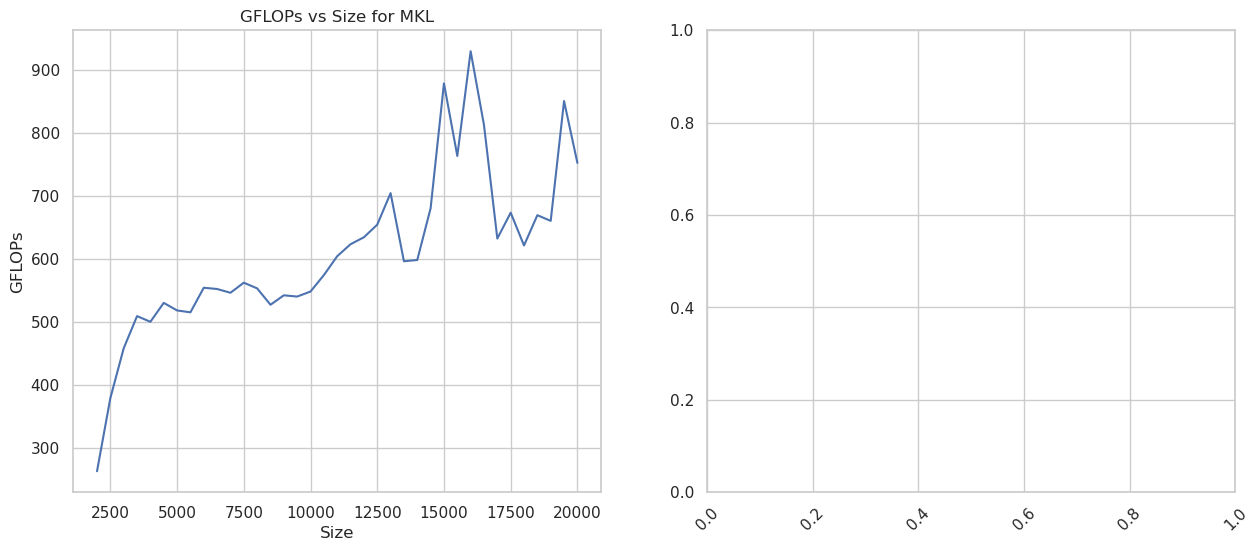

In [55]:
# Load CSV data
csv_file_path = 'csv-outputs/MKL-output.csv'
data = pd.read_csv(csv_file_path)

# Create the plot using Seaborn
sns.set(style="whitegrid")  # Set style for the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Create a 1x2 grid of subplots

#Plotting MKL-outputs
sns.lineplot(x='Size', y='GFLOPs', data=data, ax=axes[0])

axes[0].set_xlabel("Size")
axes[0].set_ylabel("GFLOPs")
axes[0].set_title("GFLOPs vs Size for MKL")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

#Plotting OBLAS-outputs
csv_file_path = 'csv-outputs/OBLAS-output.csv'
data = pd.read_csv(csv_file_path)
sns.lineplot(x='Size', y='GFLOPs', data=data, ax=axes[1])

axes[1].set_xlabel("Size")
axes[1].set_ylabel("GFLOPs")
axes[1].set_title("GFLOPs vs Size for OBLAS")

# Saving image as jpg
plt.savefig("images/matrx-scaling.jpg", dpi=300)

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Adjust layout for better appearance
plt.show()  # Show the plot



In [ ]:
# Lists to store extracted data
matrix_dimensions = []
mkl_gflops = []
OBLAS_gflops = []


# Read the text file line by line
with open('mkl-core-scaling', 'r') as file:
    for line in file:
        # Split line into words
        words = line.strip().split()

        # Extract x value (first number until 'x')
        value = float(words[0].split('x')[0])
        matrix_dimensions.append(value)

        # Extract y value (second-to-last word)
        gflop = int(round(float(words[-2])))
        mkl_gflops.append(int(gflop))


# # Read the text file line by line
with open('oblas-core-scaling', 'r') as file:
    for line in file:
        # Split line into words
        words = line.strip().split()

        # Extract y value (second-to-last word)
        gflop = int(round(float(words[-2])))
        OBLAS_gflops.append(int(gflop))


print(type(mkl_gflops[1]))

FileNotFoundError: [Errno 2] No such file or directory: 'mkl-core-scaling'

In [ ]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(10, 6))

sns.lineplot(x=matrix_dimensions, y=mkl_gflops, label='MKL')
sns.lineplot(x=matrix_dimensions, y=OBLAS_gflops, label='OBLAS')

# Set labels and title
plt.xlabel('Matrix dimensions')
plt.ylabel('GFLOPs')
plt.title('Comparison between MKL and OBLAS on dgemm.c')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()